In [1]:
from datetime import datetime
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import combinations

In [2]:
def load_data(in_file, brands_to_load = None, max_limit = 1404, verbose = False):
    """Loads data from the given data file.
    If the brands to be loaded is less than the maximum rows in the datafile, randomize the loading.
    Args:
      brands_to_load .... Number of brands to be loaded.
      in_file       .... A string representing the location and datafile name to be loaded.
    Returns:
      None. The data is loaded into the global variables."""
    
    if brands_to_load is None:
        brands_to_load = max_limit 
    
    #Randomize Loading
    if brands_to_load != max_limit:
        choices = sorted(random.sample(range(max_limit), brands_to_load))
        max_row_id = max(choices)
    else:
        choices = range(max_limit)
        max_row_id = max_limit-1
    
    brand_no = 0
    cur_idx = 0
            
    with open(in_file) as data_file:
        for row in data_file:
            if brand_no > max_row_id:
                break
            if brand_no != choices[cur_idx]:
                brand_no += 1
                continue
            else:
                followers = row.split()
                brand = followers.pop(0)
                followers_count = len(followers)
                
                #Ignoring brands with less than 1000 followers
                if followers_count > 1000:  
                    followers = [int(x) for x in followers]
                    BRAND_FOLLOWERS[brand] = set(followers)
                    BRANDS_LIST.append(brand)
                    
                    for f in followers:
                        if f not in UNIQUE_FOLLOWERS:
                            UNIQUE_FOLLOWERS[f] = set()
                        UNIQUE_FOLLOWERS[f].add(brand)
                    print('Loaded',brand,'-',followers_count,'followers')
                else:
                    print('Skipped',brand,'-',followers_count,'followers')
                    
                brand_no += 1
                cur_idx += 1
                    
    return

In [3]:
BRANDS_LIST = []
UNIQUE_FOLLOWERS = {}
BRAND_FOLLOWERS = {}
brands_to_load = 50
max_rows = 1404
verbose = True
start = datetime.now()
load_data('data/brand_followers_final.tsv', brands_to_load, max_rows, verbose)
print('Elapsed:',datetime.now()-start)
N_BRANDS = len(BRAND_FOLLOWERS)
N_FOLLOWERS = len(UNIQUE_FOLLOWERS)
print('No. of Unique Followers', N_FOLLOWERS)
print('No. of Brands', N_BRANDS)

Loaded 20thcenturyfox - 500001 followers
Loaded 8oclockcoffee - 20778 followers
Loaded allegraotc - 1030 followers
Loaded bosciaskincare - 4906 followers
Loaded bumble - 30218 followers
Loaded burtsbees - 59763 followers
Loaded caswellmassey - 1797 followers
Loaded chapstick - 1457 followers
Loaded cheerios - 31930 followers
Loaded cream_of_wheat - 16371 followers
Loaded dreamdrystyle - 4115 followers
Loaded eatwsk1 - 5417 followers
Loaded fischernwieser - 1037 followers
Loaded freschetta - 11151 followers
Loaded frigidaire - 5935 followers
Loaded genanderson - 1099 followers
Loaded guardian - 500001 followers
Loaded highoctaneinfo - 6112 followers
Loaded hungrymantweets - 1646 followers
Loaded jay_thebarber - 1262 followers
Loaded jonel_aleccia - 2104 followers
Loaded jouercosmetics - 7499 followers
Loaded kaplanmd - 2627 followers
Loaded kingshawaiian - 9061 followers
Loaded landrover - 114080 followers
Loaded lovesbabysoft - 6301 followers
Loaded makeupforeverus - 188576 followers
L

In [4]:
def get_followers(brand):
    return BRAND_FOLLOWERS[brand]

def set_followers(brand, followers):
    BRAND_FOLLOWERS[brand] = followers
    
def set_brands(user, brands):
    UNIQUE_FOLLOWERS[user] = brands

def get_brands(user):
    return UNIQUE_FOLLOWERS[user]

def get_brand_id(brand):
    return BRANDS_LIST.index(brand)

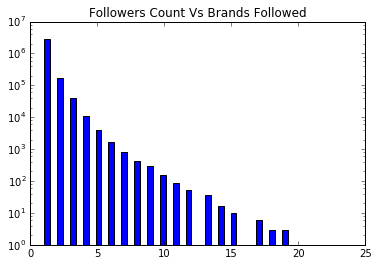

In [5]:
def plot_histogram(data,title):
    hist, bins = np.histogram(np.asarray(data),bins=50)    
    width = 0.9 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.yscale("log")
    plt.bar(center, hist, align='center', width=width)
    plt.title(title)

plot_histogram([len(v) for v in list(UNIQUE_FOLLOWERS.values())], 'Followers Count Vs Brands Followed')

In [6]:
def sample_followers(brands_min, sample_pct, split_ratio):
    ffollowers = list(map(lambda x: x[0], filter(lambda x: len(x[1]) >= brands_min, UNIQUE_FOLLOWERS.items())))
    sample = random.sample(ffollowers, int(len(ffollowers) * sample_pct))
    print('Sample taken: %d/%d followers.' % (len(sample),len(list(ffollowers))))
    train_sample_size = int(split_ratio * len(sample))
    train_sample = sample[:train_sample_size]
    test_sample = sample[train_sample_size:]
    print('Training samples:',train_sample_size)
    print('Testing samples:',len(sample)-train_sample_size)
    return train_sample, test_sample

follower_ids,test_ids = sample_followers(brands_min=5, sample_pct= 0.01, split_ratio=0.75)


Sample taken: 76/7693 followers.
Training samples: 57
Testing samples: 19


In [7]:
def get_brands_not_followed(follower_ids):
    brands = {}
    for follower_id in follower_ids:
        brands_not_followed = set(BRANDS_LIST) - get_brands(follower_id)
        brands[follower_id] = random.choice(list(brands_not_followed))
    return brands

brands_for_training = get_brands_not_followed(follower_ids)

In [8]:
def remove_links(followers):
    brands_to_remove = {}
    for follower_id in followers:
        brand = random.choice(list(get_brands(follower_id)))
        brands_to_remove[follower_id] = brand
        set_brands(follower_id,get_brands(follower_id) - set([brand]))
        set_followers(brand, get_followers(brand) - set([follower_id]))
        print('Removed link', follower_id,'-',brand)
    return brands_to_remove
removed_brands = remove_links(follower_ids)

Removed link 1906102982 - xeroxcorp
Removed link 729883376 - kingshawaiian
Removed link 2352463250 - milanicosmetics
Removed link 283429675 - milanicosmetics
Removed link 23545163 - jouercosmetics
Removed link 16867563 - freschetta
Removed link 213592259 - kingshawaiian
Removed link 246541528 - wetnwildbeauty
Removed link 366448196 - maytagbrand
Removed link 13225072 - cream_of_wheat
Removed link 2149854967 - xeroxcorp
Removed link 21117817 - caswellmassey
Removed link 2184476652 - tacobell
Removed link 538702268 - jouercosmetics
Removed link 28015594 - mariobatali
Removed link 357097642 - caswellmassey
Removed link 2204050735 - 20thcenturyfox
Removed link 2252257070 - 20thcenturyfox
Removed link 20890397 - 20thcenturyfox
Removed link 2332416490 - makeupforeverus
Removed link 594206564 - landrover
Removed link 2465062160 - parishilton
Removed link 842896614 - milanicosmetics
Removed link 25883959 - makeupforeverus
Removed link 554801470 - mariobatali
Removed link 2243508070 - parishilt

In [9]:
def get_similarity_matrix():
    DIST_MAT = np.zeros((N_BRANDS,N_BRANDS))
    
    for tuple_pair in combinations(enumerate(BRANDS_LIST),2):
        b1 = get_followers(tuple_pair[0][1])
        b2 = get_followers(tuple_pair[1][1])
        
        #Jaccard Similarity Measure
        common_connections = len(b1.intersection(b2))
        total_connections = len(b1) + len(b2) - common_connections #More efficient than set(b1).union(b2)
        sim = common_connections/total_connections
        
        #Symmetrix Distance Matrix
        DIST_MAT[tuple_pair[0][0] , tuple_pair[1][0]] = DIST_MAT[tuple_pair[1][0] , tuple_pair[0][0]] = sim
    return DIST_MAT

DIST_MAT = get_similarity_matrix()
print('%d x %d Similarity Matrix created.'%(N_BRANDS,N_BRANDS))

50 x 50 Similarity Matrix created.


In [10]:
def get_rank(sorted_scores, p_brand, n_brand):

    done = 0
    p_rank = None
    n_rank = None
    for idx, brand_score in enumerate(sorted_scores):
        if brand_score[0] == p_brand:
            p_rank = idx + 1
            done += 1
        elif brand_score[0] == n_brand:
            n_rank = idx + 1
            done += 1
        if done == 2:
            break;
    if done < 2:
        print(p_brand,p_rank, n_brand, n_rank)
    return p_rank, n_rank

In [11]:
def get_statistics(values):
    import statistics
    mean = statistics.mean(values)
    median = statistics.median(values)
    maximum = max(values)
    minimum = min(values)
    return [mean, median, maximum, minimum]

In [12]:
def get_prediction(follower_ids, p_brands, n_brands):
    p_rank = {}
    n_rank = {}
    
    for follower_id in follower_ids:
        brands_followed = get_brands(follower_id)
        brands_not_followed = set(BRANDS_LIST) - brands_followed
            
        scores = {}
        for brand_not_followed in brands_not_followed:
            bnf_idx = BRANDS_LIST.index(brand_not_followed)
            scores[brand_not_followed] = 0
            
            for brand_followed in brands_followed:
                bf_idx = BRANDS_LIST.index(brand_followed)
                scores[brand_not_followed] += DIST_MAT[bf_idx, bnf_idx]
    
        prediction = sorted(scores.items(), key=lambda x: x[1]/len(brands_followed), reverse=True)
        p_rank[follower_id], n_rank[follower_id] = get_rank(prediction, p_brands[follower_id], n_brands[follower_id])
        
    return p_rank, n_rank

positive_rank_prediction, negative_rank_prediction = get_prediction(follower_ids,removed_brands,brands_for_training)

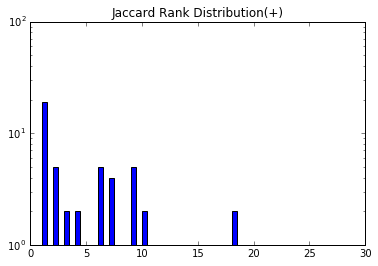

In [13]:
plot_histogram(list(positive_rank_prediction.values()),'Jaccard Rank Distribution(+)')

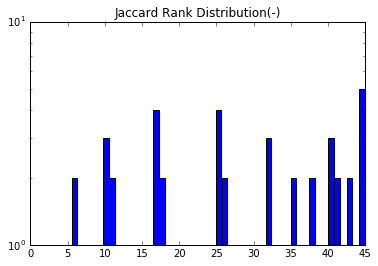

In [14]:
plot_histogram(list(negative_rank_prediction.values()),'Jaccard Rank Distribution(-)')

In [15]:
positive_statistics = get_statistics(positive_rank_prediction.values())
print('Jaccard Rank Statistics(+)', positive_statistics)
negative_statistics = get_statistics(negative_rank_prediction.values())
print('Jaccard Rank Statistics(-)', negative_statistics)

Jaccard Rank Statistics(+) [6.754385964912281, 5, 26, 1]
Jaccard Rank Statistics(-) [26.50877192982456, 28, 45, 3]


In [16]:
def get_worst_prediction(prediction, brands, source='+'):
    if source == '+':
        id_worst,rank_worst = max(prediction.items(), key=lambda x: x[1])
    elif source == '-':
        id_worst,rank_worst = min(prediction.items(), key=lambda x: x[1])
    print('(%s) Worst Jaccard Prediction %d for brand %s followed by %s'%(source, rank_worst, brands[id_worst], id_worst))
    print('Brands Followed', get_brands(id_worst))
get_worst_prediction(positive_rank_prediction,removed_brands, '+')
get_worst_prediction(negative_rank_prediction,brands_for_training,'-')

(+) Worst Jaccard Prediction 26 for brand tacobell followed by 563976941
Brands Followed {'jouercosmetics', 'kingshawaiian', 'burtsbees', 'wooliteus', 'maytagbrand', 'frigidaire', 'milanicosmetics'}
(-) Worst Jaccard Prediction 3 for brand wooliteus followed by 538702268
Brands Followed {'burtsbees', 'milanicosmetics', 'mariobatali', 'tacobell'}


In [17]:
def bar_plot(data_points, title):
    x = [p[0] for p in data_points]
    y = [p[1] for p in data_points]
    plt.bar(x,y)
    plt.title(title)

In [18]:
def get_rank_by_brands_count(follower_ids, prediction_rank):
    mean_rank = {}
    brands_followed_count = {}
    for follower_id in follower_ids:
        count = len(get_brands(follower_id))
        if count in mean_rank.keys():
            mean_rank[count] += prediction_rank[follower_id]
            brands_followed_count[count] += 1
        else:
            mean_rank[count] = prediction_rank[follower_id]
            brands_followed_count[count] = 1
    for k in mean_rank:
        mean_rank[k] //= brands_followed_count[k]
    return mean_rank

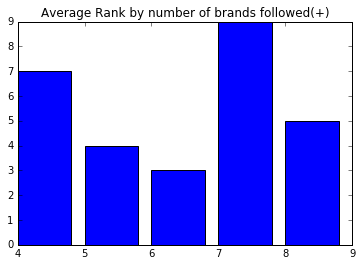

In [19]:
positive_mean_ranks = get_rank_by_brands_count(follower_ids, positive_rank_prediction)
bar_plot(positive_mean_ranks.items(),'Average Rank by number of brands followed(+)')

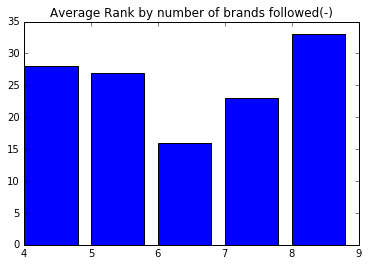

In [20]:
negative_mean_ranks = get_rank_by_brands_count(follower_ids, negative_rank_prediction)
bar_plot(negative_mean_ranks.items(),'Average Rank by number of brands followed(-)')

In [21]:
def get_ranks_by_followed_brands_count(follower_ids, rank_prediction):

    statistics = {}
    brands_followed = {}
    for follower_id in follower_ids:
        count = len(get_brands(follower_id))
        if count in brands_followed.keys():
            brands_followed[count].append(rank_prediction[follower_id])
        else:
            brands_followed[count] = [rank_prediction[follower_id]]
    for key in brands_followed:
        statistics[key] = get_statistics(brands_followed[key])
    
    return statistics

positive_binned_statistics = get_ranks_by_followed_brands_count(follower_ids, positive_rank_prediction)
negative_binned_statistics = get_ranks_by_followed_brands_count(follower_ids, negative_rank_prediction)

In [22]:
def get_similarity_scores(follower_id):
    
    brands_followed = get_brands(follower_id)
    brands_not_followed = set(BRANDS_LIST) - brands_followed
            
    scores = {}
    for brand_not_followed in brands_not_followed:
        bnf_idx = BRANDS_LIST.index(brand_not_followed)
        scores[brand_not_followed] = 0
        
        for brand_followed in brands_followed:
            bf_idx = BRANDS_LIST.index(brand_followed)
            scores[brand_not_followed] += DIST_MAT[bf_idx, bnf_idx]

    return scores

In [23]:
def get_features(follower, brand, scores):
    statistics = get_statistics(scores.values())
    brand_stats = len(get_followers(brand))/N_FOLLOWERS
    brands_followed = len(get_brands(follower))/N_BRANDS
    record = [scores[brand], brand_stats, brands_followed] + statistics
    return record

In [24]:
def get_records(follower_ids, removed_brands, brands):
    positive_records = {}
    negative_records = {}
    for follower_id in follower_ids:
        p_brand = removed_brands[follower_id]
        n_brand = brands[follower_id]
        scores = get_similarity_scores(follower_id)
        p_record = get_features(follower_id, p_brand,scores)
        n_record = get_features(follower_id, n_brand,scores)
        positive_records[follower_id] = p_record
        negative_records[follower_id] = n_record
    return positive_records, negative_records

positive_records, negative_records = get_records(follower_ids, removed_brands, brands_for_training)

In [25]:
positive_records

{10277422: [0.10144267898942022,
  0.0029789154090631644,
  0.1,
  0.038510432049269329,
  0.011976742231459201,
  0.22612158817671865,
  0.00041348627899618533],
 13225072: [0.31034332301466505,
  0.0053829639451916395,
  0.1,
  0.035182917065932129,
  0.011821332087603064,
  0.31034332301466505,
  0.00022652808358737843],
 16867563: [0.29454521822677066,
  0.0036659273641893456,
  0.12,
  0.044334530825295662,
  0.012917975164604302,
  0.36627486067676657,
  0.00052524823123138221],
 19320793: [0.11097093322003024,
  0.019654001178674413,
  0.08,
  0.020582558779749696,
  0.0097244791281041187,
  0.11097093322003024,
  0.00028428189483202364],
 20890397: [0.013362787954255389,
  0.1644349466439351,
  0.08,
  0.028674260789978562,
  0.013282405025786485,
  0.22765637419232237,
  0.00034903718857016096],
 21117817: [0.090225539637275656,
  0.000590323819747006,
  0.16,
  0.051471541625243519,
  0.014893806795664542,
  0.32075740910248118,
  0.0013373071314501045],
 23545163: [0.0571354

In [26]:
negative_records

{10277422: [0.0016061630873318465,
  0.0006919450232577719,
  0.1,
  0.038510432049269329,
  0.011976742231459201,
  0.22612158817671865,
  0.00041348627899618533],
 13225072: [0.0030612513879910868,
  0.0003614294584412031,
  0.1,
  0.035182917065932129,
  0.011821332087603064,
  0.31034332301466505,
  0.00022652808358737843],
 16867563: [0.02327378788575149,
  0.002007429858348593,
  0.12,
  0.044334530825295662,
  0.012917975164604302,
  0.36627486067676657,
  0.00052524823123138221],
 19320793: [0.00093416193842406521,
  0.0006015054408452779,
  0.08,
  0.020582558779749696,
  0.0097244791281041187,
  0.11097093322003024,
  0.00028428189483202364],
 20890397: [0.0037738767379217717,
  0.0008639446654458967,
  0.08,
  0.028674260789978562,
  0.013282405025786485,
  0.22765637419232237,
  0.00034903718857016096],
 21117817: [0.0013373071314501045,
  0.00041503546547115404,
  0.16,
  0.051471541625243519,
  0.014893806795664542,
  0.32075740910248118,
  0.0013373071314501045],
 235451

In [27]:
x_train = []
y_train = []
for follower_id in follower_ids:
    x_train.append(positive_records[follower_id])
    y_train.append(1)
    x_train.append(negative_records[follower_id])
    y_train.append(0)

In [28]:
def get_metrics(actual, prediction):
    from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
    print('Confusion Matrix:\n',confusion_matrix(actual,prediction))
    print('F1-Score:',f1_score(actual,prediction))
    print('Accuracy:', accuracy_score(actual,prediction))
    print('Precision:', precision_score(actual,prediction))
    print('Recall:', recall_score(actual,prediction))

In [29]:
def train(x_train, y_train):
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression()
    model.fit(x_train,y_train)
    return model

model = train(x_train, y_train)

In [30]:
y_train_predict = model.predict(x_train)
get_metrics(y_train, y_train_predict)
model.predict_proba(x_train)

Confusion Matrix:
 [[56  1]
 [27 30]]
F1-Score: 0.681818181818
Accuracy: 0.754385964912
Precision: 0.967741935484
Recall: 0.526315789474


array([[ 0.5172228 ,  0.4827772 ],
       [ 0.55134533,  0.44865467],
       [ 0.50469024,  0.49530976],
       [ 0.55498484,  0.44501516],
       [ 0.31612783,  0.68387217],
       [ 0.57001408,  0.42998592],
       [ 0.2778765 ,  0.7221235 ],
       [ 0.54108015,  0.45891985],
       [ 0.51795987,  0.48204013],
       [ 0.55608322,  0.44391678],
       [ 0.36963822,  0.63036178],
       [ 0.55351108,  0.44648892],
       [ 0.50087772,  0.49912228],
       [ 0.530929  ,  0.469071  ],
       [ 0.2715022 ,  0.7284978 ],
       [ 0.57164283,  0.42835717],
       [ 0.41419049,  0.58580951],
       [ 0.52991295,  0.47008705],
       [ 0.35510778,  0.64489222],
       [ 0.56309949,  0.43690051],
       [ 0.52567388,  0.47432612],
       [ 0.54088419,  0.45911581],
       [ 0.50462574,  0.49537426],
       [ 0.56550395,  0.43449605],
       [ 0.48443741,  0.51556259],
       [ 0.52283554,  0.47716446],
       [ 0.53588486,  0.46411514],
       [ 0.52580796,  0.47419204],
       [ 0.5316039 ,

In [31]:
def add_removed_links(follower_ids, removed_brands):
    for follower in follower_ids:
        brand = removed_brands[follower]
        set_brands(follower, get_brands(follower) | set([brand]))
        set_followers(brand, get_followers(brand) | set([follower]))

add_removed_links(follower_ids, removed_brands)
removed_brands_test = remove_links(test_ids)

Removed link 176459403 - maytagbrand
Removed link 57362478 - 20thcenturyfox
Removed link 1069141086 - cheerios
Removed link 348892681 - cream_of_wheat
Removed link 2437886834 - guardian
Removed link 1683667476 - bumble
Removed link 2382637836 - tacobell
Removed link 295774675 - tacobell
Removed link 29548454 - wetnwildbeauty
Removed link 721543256 - cream_of_wheat
Removed link 2255931295 - tacobell
Removed link 2285357293 - landrover
Removed link 410058152 - burtsbees
Removed link 809823577 - parishilton
Removed link 125539001 - tacobell
Removed link 865526154 - cheerios
Removed link 1291302662 - mariobatali
Removed link 531921557 - makeupforeverus
Removed link 1419394734 - wetnwildbeauty


In [32]:
DIST_MAT = get_similarity_matrix()
print('%d x %d Similarity Matrix created.'%(N_BRANDS,N_BRANDS))

50 x 50 Similarity Matrix created.


In [33]:
k = 10
brands_to_rank = {}
brands_to_lookup = {}
for follower_id in test_ids:
    scores = get_similarity_scores(follower_id)
    candidates = sorted(scores.items(), key=lambda x: x[1]/len(get_brands(follower_id)), reverse=True)[:k]
    brands_to_rank[follower_id] = []
    brands_to_lookup[follower_id] = []
    for brand, score in candidates:
        record = get_features(follower_id, brand,scores)
        brands_to_rank[follower_id].append(record)
        brands_to_lookup[follower_id].append(brand)
brands_to_rank

{29548454: [[0.43941162095716779,
   0.02561413409526215,
   0.08,
   0.023941374002925633,
   0.0097875747312049649,
   0.43941162095716779,
   0.00020141346997448037],
  [0.074418027269279,
   0.001613442150238892,
   0.08,
   0.023941374002925633,
   0.0097875747312049649,
   0.43941162095716779,
   0.00020141346997448037],
  [0.071580335161830586,
   0.019654001178674413,
   0.08,
   0.023941374002925633,
   0.0097875747312049649,
   0.43941162095716779,
   0.00020141346997448037],
  [0.068056958581417151,
   0.009937501315484836,
   0.08,
   0.023941374002925633,
   0.0097875747312049649,
   0.43941162095716779,
   0.00020141346997448037],
  [0.043618847499516486,
   0.0033419892235482308,
   0.08,
   0.023941374002925633,
   0.0097875747312049649,
   0.43941162095716779,
   0.00020141346997448037],
  [0.038543347392578781,
   0.16443560438635263,
   0.08,
   0.023941374002925633,
   0.0097875747312049649,
   0.43941162095716779,
   0.00020141346997448037],
  [0.032311288514283262

In [36]:
y_predict = []
y_actual = []
for follower_id in test_ids:
    x_test = []
    candidates = brands_to_rank[follower_id]
    for record in candidates:
        x_test.append(record)
    y_prob = model.predict_proba(x_test)
    result = [(x,y[1]) for x,y in zip(brands_to_lookup[follower_id], y_prob)]
    result = sorted(result, key=lambda x: x[1], reverse=True)[0]
    if result[0] == removed_brands_test[follower_id]:
        y_predict.append(1)
    else:
        y_predict.append(0)
    
    y_actual.append(1)
    
get_metrics(y_actual, y_predict)

Confusion Matrix:
 [[ 0  0]
 [13  6]]
F1-Score: 0.48
Accuracy: 0.315789473684
Precision: 1.0
Recall: 0.315789473684
